# CNNs for regression tasks

Convolutional Neural Networks (CNNs) are widely used for image classification tasks, but they can also be effectively applied to regression tasks. In regression tasks, the goal is to predict a continuous output variable based on input data. 

On of the key elements in regression tasks using CNNs is the choice of the activation function in the convolutional (and fully connected) layers. While ReLU (Rectified Linear Unit) is a popular choice for classification tasks, it may not always be the best option for regression tasks.

In [39]:
# Import necessary modules

import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch.nn as nn
from torch.utils.data import DataLoader

from sklearn.model_selection import train_test_split

from cnns.cnn import CNN
from ready_dataset import ArrowDataset

## Importing the data

We can now import the data to display several examples.

In [20]:
data_df = pd.read_csv('./data/labels.csv')
images, angles = [], []
for idx, row in data_df.iterrows():
    img = plt.imread(os.path.join('./data/images', row['image_name']))
    images.append(img)
    angles.append(row['angle'])
    
images = np.array(images)
angles = np.array(angles)

In [21]:
print(f'Number of samples: {len(images)}')
print(f'Image shape: {images[0].shape}')

Number of samples: 10000
Image shape: (64, 64, 4)


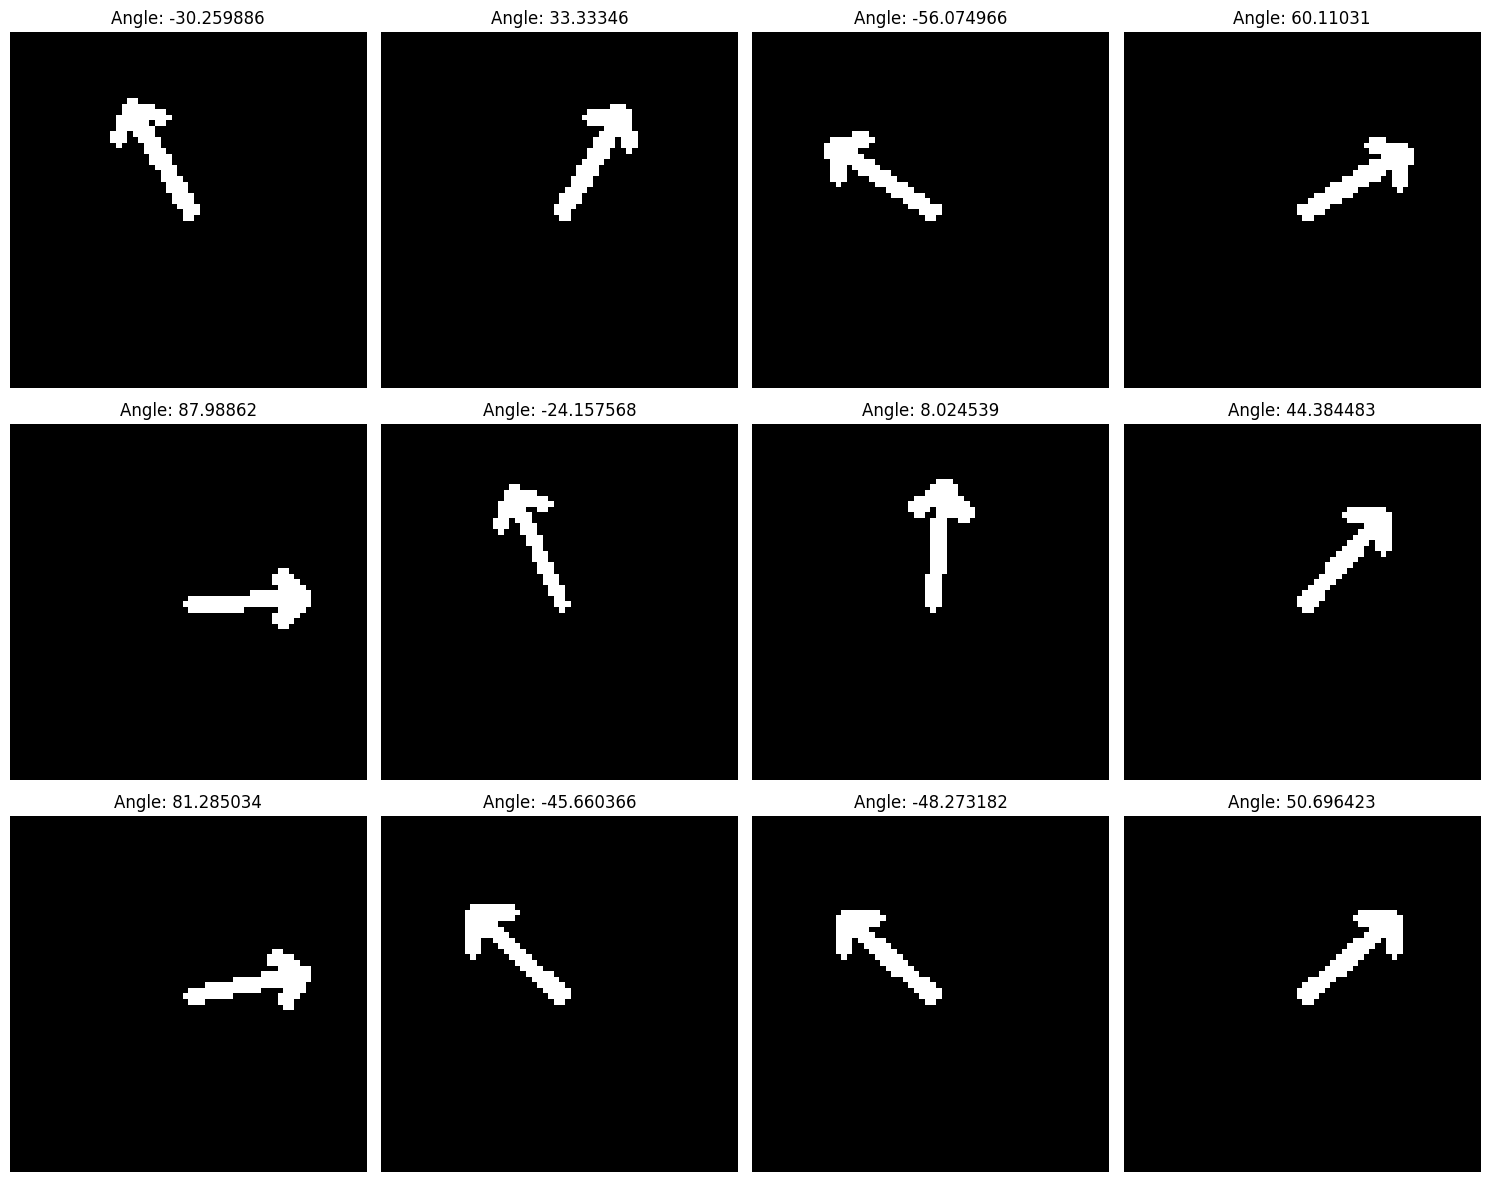

In [22]:
# Display several examples (12)
fig, axes = plt.subplots(3, 4, figsize=(15, 12))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.set_title(f'Angle: {angles[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

<ins>Note :</ins> Each angle is between -90 and 90 degrees. The angles are continuous values, measured in degrees and represent the orientation of the object in the image with respect to the y-axis (vertical axis). An angle of 0 degrees indicates that the object is perfectly vertical, while positive angles indicate a clockwise rotation and negative angles indicate a counterclockwise rotation.

## Objective of the project

The objective of this project is to build and train a Convolutional Neural Network (CNN) model that can accurately predict the angle of rotation of the arrows in each image. 

To achieve this, we will follow these steps:
1. Data Preprocessing: Given that we have generated the dataset ourselves, we do not need to perform extensive data cleaning or preprocessing. Indeed, the images are already in a suitable format for training a CNN model. The pixel values are also binary (0 or 1 - black and white images), and so the images are already normalized.

2. Splitting the Dataset: We will split the dataset into training, validation, and test sets. The training set will be used to train the model, the validation set will be used to tune hyperparameters and evaluate the model during training, and the test set will be used to assess the final performance of the model.
<ins>Attention :</ins> Since the target variable (angle) is continuous, we will use stratified sampling based on binned angle values to ensure that each set has a representative distribution of angles.

3. Model Architecture: We designed a simple CNN architecture suitable for regression tasks. The model consists of several convolutional layers followed by fully connected layers. The final layer has a single neuron with a linear activation function to output the predicted angle.

4. Training the Model: We will compile the model using a loss function suitable for regression tasks, such as Mean Squared Error (MSE) or Root Mean Squared Error (RMSE). We will then train the model using the training set and validate it using the validation set, using different **activation functions** and **initialization methods** to compare their performance, and highlight the importance of these choices in regression tasks (and therefore in classification tasks as well).

---

In [30]:
bins = [-90, -60, -30, 0, 30, 60, 90]
angles_binned = np.digitize(angles, bins)
print('Binned angle distribution:')
for i in range(1, len(bins)):
    count = np.sum(angles_binned == i)
    print(f'Bin {bins[i-1]} to {bins[i]}: {count} samples')

Binned angle distribution:
Bin -90 to -60: 1671 samples
Bin -60 to -30: 1724 samples
Bin -30 to 0: 1649 samples
Bin 0 to 30: 1688 samples
Bin 30 to 60: 1650 samples
Bin 60 to 90: 1618 samples


In [34]:
X_train, X_temp, y_train, y_temp = train_test_split(images, angles, test_size=0.3, random_state=42, stratify=angles_binned)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=np.digitize(y_temp, bins))

In [35]:
print(f'Training set size: {len(X_train)}')
print("")
# Bins distribution in training set
train_binned = np.digitize(y_train, bins)
print('Binned angle distribution (training set):')
for i in range(1, len(bins)):
    count = np.sum(train_binned == i)
    print(f'Bin {bins[i-1]} to {bins[i]}: {count} samples')
print("--------------------------------")

print(f'Validation set size: {len(X_val)}')
# Bins distribution in validation set
val_binned = np.digitize(y_val, bins)
print('Binned angle distribution (validation set):')
for i in range(1, len(bins)):
    count = np.sum(val_binned == i)
    print(f'Bin {bins[i-1]} to {bins[i]}: {count} samples')
print("--------------------------------")

print(f'Test set size: {len(X_test)}')
# Bins distribution in test set
test_binned = np.digitize(y_test, bins)
print('Binned angle distribution (test set):')
for i in range(1, len(bins)):
    count = np.sum(test_binned == i)
    print(f'Bin {bins[i-1]} to {bins[i]}: {count} samples')
print("--------------------------------")

Training set size: 7000

Binned angle distribution (training set):
Bin -90 to -60: 1170 samples
Bin -60 to -30: 1207 samples
Bin -30 to 0: 1154 samples
Bin 0 to 30: 1182 samples
Bin 30 to 60: 1155 samples
Bin 60 to 90: 1132 samples
--------------------------------
Validation set size: 1500
Binned angle distribution (validation set):
Bin -90 to -60: 251 samples
Bin -60 to -30: 259 samples
Bin -30 to 0: 247 samples
Bin 0 to 30: 253 samples
Bin 30 to 60: 247 samples
Bin 60 to 90: 243 samples
--------------------------------
Test set size: 1500
Binned angle distribution (test set):
Bin -90 to -60: 250 samples
Bin -60 to -30: 258 samples
Bin -30 to 0: 248 samples
Bin 0 to 30: 253 samples
Bin 30 to 60: 248 samples
Bin 60 to 90: 243 samples
--------------------------------


---

### Considered activation functions:

To assess the impact of activation functions on regression tasks using CNNs, we will consider the following activation functions:
- ReLU (Rectified Linear Unit)
- Tanh (Hyperbolic Tangent)
- Sigmoid
- PReLU (Parametric ReLU)

Given the nature of our regression task, we expect that some activation functions may perform better than others. For instance, we don't expect ReLU to perform well, given how it is defined:

$$
f(x) = max(0, x)
$$

so 

$$
\forall x < 0, f(x) = 0
$$

which can lead to negative values being completely ignored during training: this is problematic for our task, given that our angles can be negative (between -90 and 90 degrees).


### Initialization methods:

We will also explore different weight initialization methods to see how they affect the training and performance of the CNN model. The considered initialization methods are:
- Uniform Initialization
- Xavier Initialization
- He Initialization



---

In [40]:
# Activation functions
activations = [nn.ReLU(), nn.Tanh(), nn.Sigmoid(), nn.PReLU()]

# Initialization methods
initializations = [
    "uniform",
    "xavier",
    "he"
]

---

## Ready the data for the training, validation and testing

In [41]:
# Create Dataset instances
train_dataset = ArrowDataset(X_train, y_train)
val_dataset   = ArrowDataset(X_val, y_val)
test_dataset  = ArrowDataset(X_test, y_test)

# Create DataLoaders
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)